In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/titanic/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Phân tích đơn biến

#### continous variable

In [6]:
#Fare
df['Fare'].median(), df['Fare'].mean(), df['Fare'].mode()

(14.4542, 32.204207968574636, 0    8.05
 dtype: float64)

In [7]:
df['Fare'].skew()

4.787316519674893

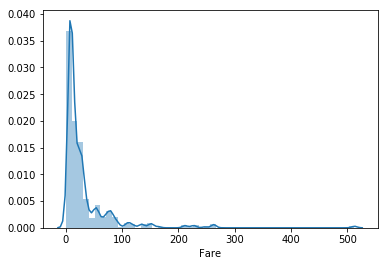

In [12]:
sns.distplot(df['Fare'])
plt.show()

In [13]:
df['Fare'].describe(include='all')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
sns.boxplot(df['Fare'])
plt.show()

#### Categorical variable

In [16]:
#Pclass
classes = df.groupby('Pclass').count()['PassengerId']
classes

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

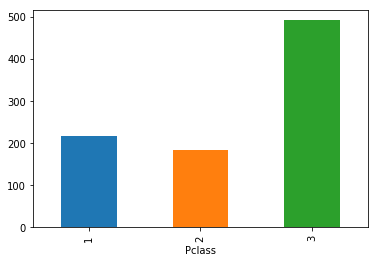

In [17]:
classes.plot.bar()
plt.show()

### Phân tích 2 biến

#### Continous & Continous

In [21]:
#Age và Fare
df[['Age', 'Fare']].corr()

Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000

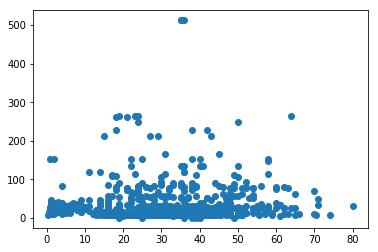

In [22]:
plt.scatter(df['Age'],df['Fare'])
plt.show()

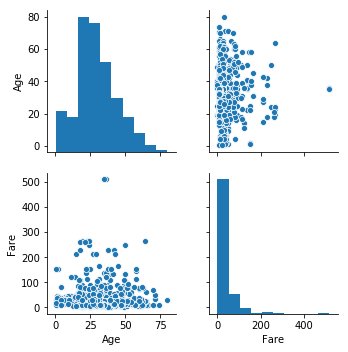

In [23]:
sns.pairplot(df[['Age', 'Fare']])
plt.show()

### Categorical & Categorical

In [26]:
table = pd.crosstab(df['Pclass'], df['Survived'])
table

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

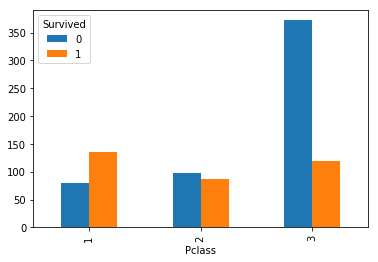

In [27]:
table.plot.bar()
plt.show()

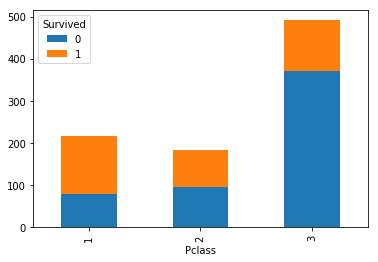

In [28]:
table.plot(kind='bar', stacked=True)
plt.show()

In [29]:
t1 = df.groupby(['Pclass','Survived']).count()['PassengerId']
t1

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [30]:
t1.plot.bar()
plt.show()

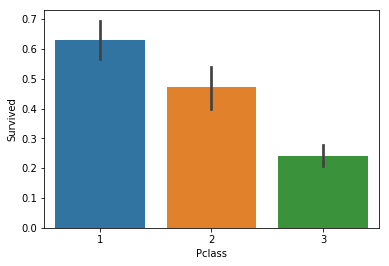

In [31]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

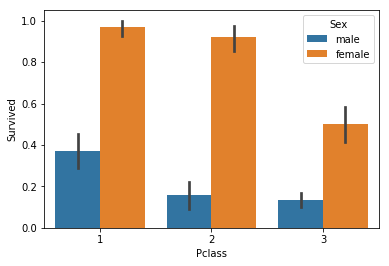

In [32]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.show()

In [33]:
from scipy.stats import chi2_contingency, chi2

In [34]:
table = pd.crosstab(df['Pclass'], df['Survived'])
table

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

In [35]:
stat, p, dof, expected = chi2_contingency(table)

In [36]:
dof

2

In [37]:
#test_statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
critical

5.991464547107979

In [39]:
stat

102.88898875696056

In [38]:
if abs(stat) >= critical:
    print('Pclass and Survived: Dependent (Reject H0) ')
else:
    print('Pclass and Survived: Independent (Not reject H0) ')

Pclass and Survived: Dependent (Reject H0) 


In [40]:
#p-value
alpha = 1.0 - prob
alpha

0.050000000000000044

In [41]:
if p <= alpha:
    print('Pclass and Survived: Dependent (Reject H0) ')
else:
    print('Pclass and Survived: Independent (Not reject H0) ')

Pclass and Survived: Dependent (Reject H0) 


### Countinous & Categorical

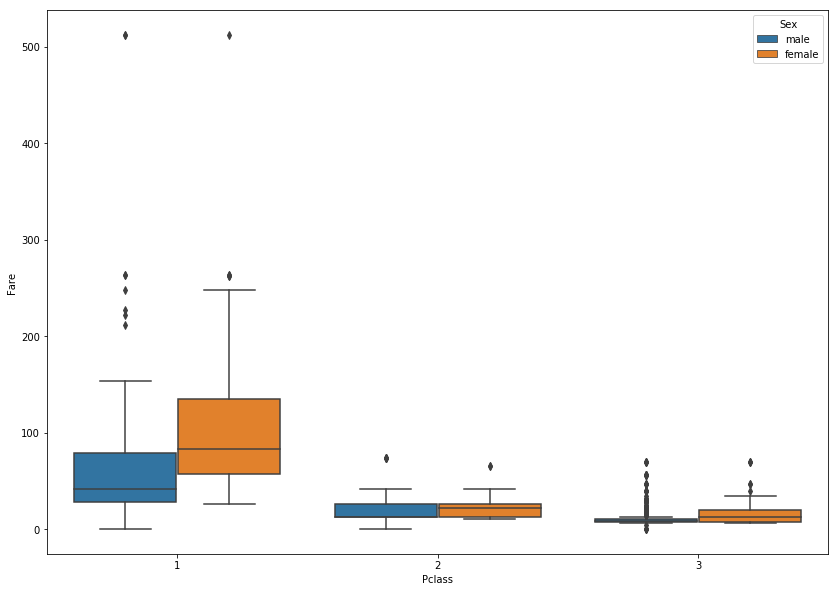

In [42]:
# Pclass, Sex, Fare
plt.figure(figsize=(14, 10))
sns.boxplot(x='Pclass', y='Fare', hue='Sex', data=df)
plt.show()

In [43]:
#anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
model = ols('Fare ~ C(Pclass) + C(Sex) + C(Pclass):C(Sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F        PR(>F)
C(Pclass)         7.347122e+05    2.0  242.620968  9.763645e-85
C(Sex)            3.174857e+04    1.0   20.968394  5.337586e-06
C(Pclass):C(Sex)  5.002816e+04    2.0   16.520591  9.034206e-08
Residual          1.339992e+06  885.0         NaN           NaN

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [56]:
for name, grouped_df in df.groupby('Pclass'):
    result = pairwise_tukeyhsd(endog=grouped_df['Fare'], groups=grouped_df['Sex'], alpha=0.05)
    print('Pclass:', name, result)
    print()

Pclass: 1 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
female  male  -38.8997 -59.4959 -18.3035  True 
-----------------------------------------------

Pclass: 2 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
female  male  -2.2283  -6.1896 1.7329 False 
--------------------------------------------

Pclass: 3 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
female  male  -3.4572  -5.7329 -1.1815  True 
---------------------------------------------



In [52]:
t = df.groupby('Pclass')
